Importa o modelo a ser fatiado e mapeado

In [1]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/Downloads/Tangran3/TangranV2/input/stl_models/cubo70.STL
Second arg: 300.0
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2/input/sliced
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = 0, model zmax = 20, first plane Z = -1.996, number of planes = 12
-Incremental, cubo70.STL, thickness = 2, #T = 176, #P = 10, #S = 880, 0.000113s (slicing), 0.000804s (polygon assembling), 0.001816s (total), *K: 5


rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing output file: out_3d.svg
... done


Total de [criando as camadas] : 1.444890022277832
salvando as camadas
Total de [salvando as camadas] : 0.26662516593933105
Total de [Fase 0: ] : 1.712651014328003


Paredes Finas

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO: anotar todos os (não fechou contorno)
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.00011467933654785156
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.02899336814880371
Total de [Criando paredes finas] : 1.876023769378662
Total de [Fase 1: Camada: 0] : 1.888906478881836
Fase 1: Camada: 1
Criando paredes finas
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.00037550926208496094
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.026286602020263672
Total de [Criando paredes finas] : 1.4869863986968994
Total de [Fase 1: Camada: 1] : 1.5016400814056396
Fase 1: Camada: 2
Criando paredes finas
salvando imagens das regiões
Total de [salvando imagens das regiões] : 9.655952453613281e-05
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.02555704116821289
Total de [Criando paredes finas] : 1.3794293403625488
Total de [Fase 1: Camada: 2] : 1.39

Contornos

In [3]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,internal_max,external_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 4
Total de [Criando Lvls] : 2.115572929382324
Criando os loops
Total de [Criando os loops] : 1.1182992458343506
Criando regiões de influência
Total de [Criando regiões de influência] : 0.06754302978515625
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.8092505931854248
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:1079 maior void:0.33877038895859474Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:1872 maior void:0.5872020075282308Bw -> aceito
['Lvl_002', 0, 0] Perdendo total:1636 maior void:0.5131744040150564Bw -> aceito
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_002', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_003', 0, 0] Perdendo total:15027 maior void:9.170639899623588Bw -> bloqueado
['Lvl_003', 0, 1] Perdendo total:15010 maior void:9.271016311166877Bw -> bloqueado
['Lvl_003', 0, 2] Perdendo to

Pontes

In [4]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, nozzle_diam_internal] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        c.make_bridges(n_max, nozzle_diam_internal, folders)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c" 
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.23653030395507812
Criando pontes de Zigzag
[3#mFechou uma ponte OK
[3#mFechou uma ponte OK
[3#mFechou uma ponte OK
[3#mFechou uma ponte OK
Total de [Criando pontes de Zigzag] : 4.321627855300903
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Total de [Criando pontes de Crossover] : 0.19921445846557617
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.012511014938354492
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.24523329734802246
Total de [Fase 3: Camada: 0] : 5.036449670791626
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.22467732429504395
Criando pontes de Zigzag
[3#mFechou uma ponte OK
[3#mFechou uma ponte OK
[3#mFechou uma ponte OK
[3#mFechou uma ponte OK
Total de [Criando pontes de Zigzag] : 4.372286558151245
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior

Zigzags

In [5]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.102304220199585
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.043477773666381836
Total de [Fase 4: Camada: 0] : 1.3393878936767578
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.958806037902832
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.04259490966796875
Total de [Fase 4: Camada: 1] : 1.174917221069336
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.9435522556304932
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.04422307014465332
Total de [Fase 4: Camada: 2] : 1.1416099071502686
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.9680018424987793
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.05048847198486328
Total de [Fase 4: Camada: 3] : 1.201038837432861

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.3078274726867676
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.27871036529541016
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.2818620204925537
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.2853255271911621
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.27613282203674316
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.2919473648071289
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.3117072582244873
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.2791759967803955
Fase 4: Camada: 8


Total de [Fase 4: Camada: 8] : 0.28421735763549805
Fase 4: Camada: 9


Total de [Fase 4: Camada: 9] : 0.36986851692199707


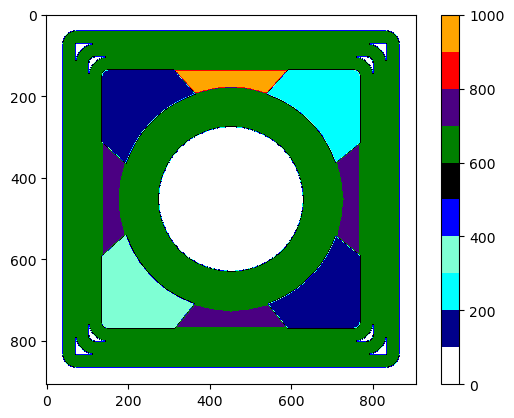

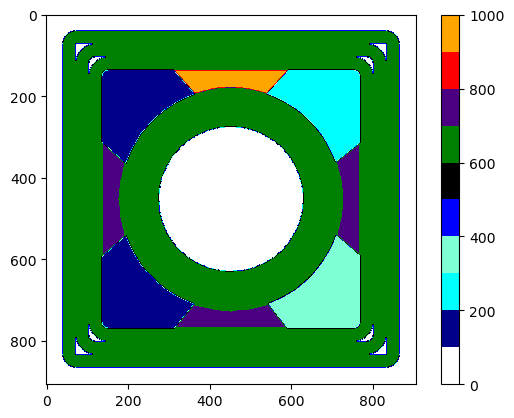

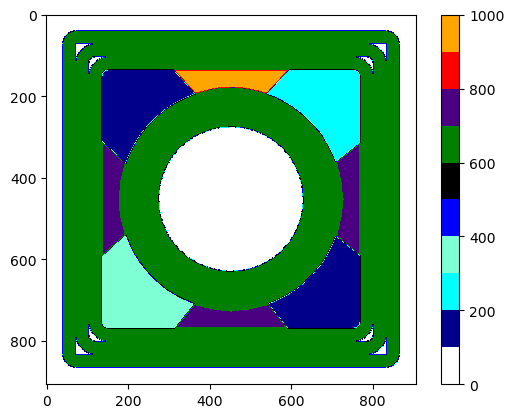

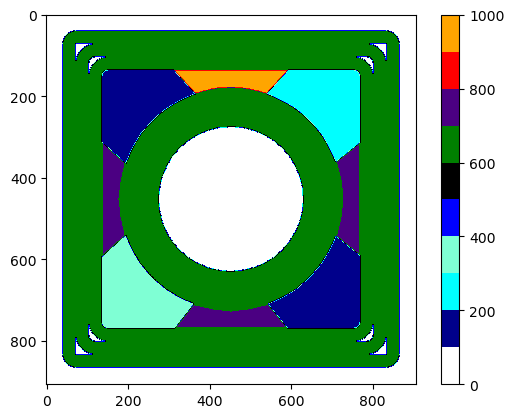

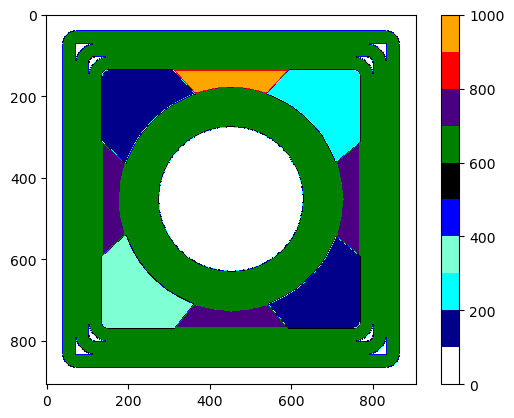

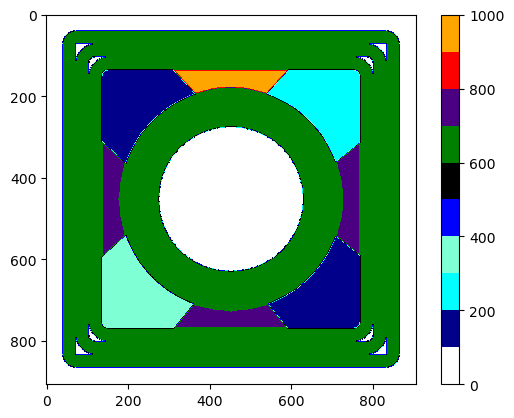

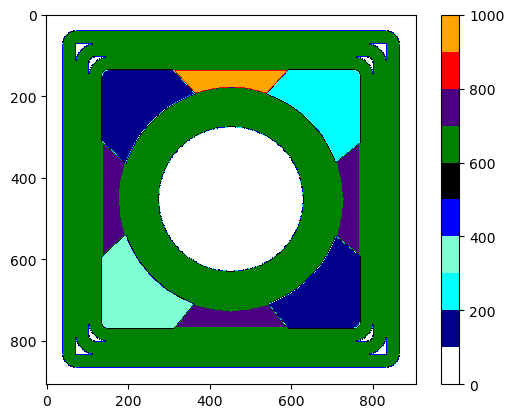

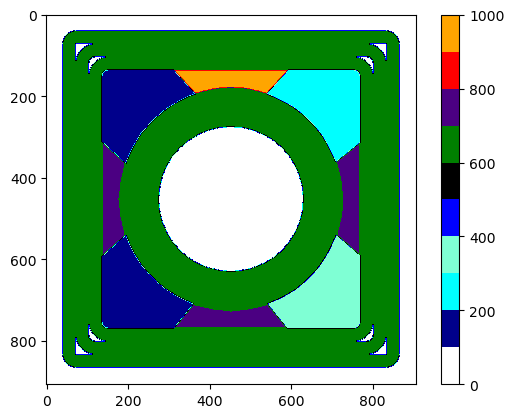

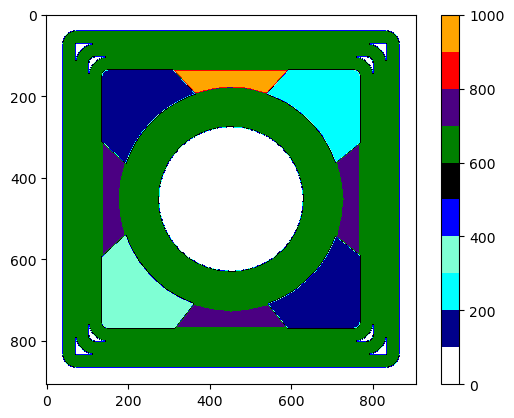

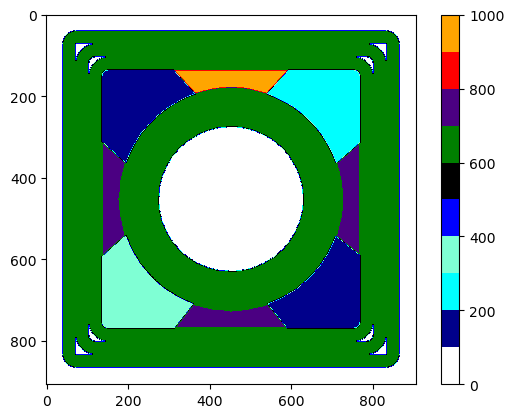

In [6]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [7]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.10915803909301758
Total de [Making offset routes] : 2.7754948139190674
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08023691177368164
Total de [Making offset routes] : 2.420917272567749
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.12245512008666992
Total de [Making offset routes] : 2.5868170261383057
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.10419678688049316
Total de [Making offset routes] : 2.158320426940918
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.10822319984436035
Total de [Making offset routes] : 2.3224072456359863
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.12620210647583008
Total de [Making offset routes] : 2.289611339569092
Making offset routes
salvando imagens

Rotas de pontes

In [8]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making bridges routes"):
        c.make_bridges_routes(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.18291378021240234
Total de [Making bridges routes] : 10.258325338363647
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.18506979942321777
Total de [Making bridges routes] : 9.718574047088623
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.19255375862121582
Total de [Making bridges routes] : 9.656941175460815
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.18890666961669922
Total de [Making bridges routes] : 9.77456784248352
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.19392013549804688
Total de [Making bridges routes] : 9.790136337280273
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.19419169425964355
Total de [Making bridges routes] : 10.371557712554932
Making bridges routes
salva

Rotas de Ziguezague

In [9]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making zigzag routes
criando as rotas de zigzag, camada:L_000
fazendo as tres opções:
Total de [fazendo as tres opções:] : 5.293691158294678
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.1704869270324707
fazendo as tres opções:
Total de [fazendo as tres opções:] : 5.276057004928589
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.16985368728637695
fazendo as tres opções:
Total de [fazendo as tres opções:] : 5.48205041885376
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.1711874008178711
fazendo as tres opções:
Total de [fazendo as tres opções:] : 5.609587669372559
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.17690634727478027
Total de [criando as rotas de zigzag, camada:L_000] : 23.86890959739685
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.12739133834838867
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.10868239402770996
Conectando regiões de zigzag
Total de [Conectando regiões d

Weaving

In [10]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[internal_weaving] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(internal_weaving, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.975081205368042
salvando rotas
Total de [salvando rotas] : 0.1375594139099121
Total de [Fase 5 b] : 2.1134674549102783
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.8745989799499512
salvando rotas
Total de [salvando rotas] : 0.13312530517578125
Total de [Fase 5 b] : 2.0084471702575684
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.8179905414581299
salvando rotas
Total de [salvando rotas] : 0.1347057819366455
Total de [Fase 5 b] : 1.9534976482391357
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.8174705505371094
salvando rotas
Total de [salvando rotas] : 0.13443756103515625
Total de [Fase 5 b] : 1.952671766281128
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.7220923900604248
salvando rotas
Total de

Rotas de Thin Walls

In [11]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 3.361701965332031e-05
Total de [Making thin walls routes] : 0.02992868423461914
Total de [Fase 5] : 0.030093669891357422
Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.5987625122070312e-05
Total de [Making thin walls routes] : 0.02235555648803711
Total de [Fase 5] : 0.022382020950317383
Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.5033950805664062e-05
Total de [Making thin walls routes] : 0.023509979248046875
Total de [Fase 5] : 0.02353072166442871
Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.5987625122070312e-05
Total de [Making thin walls routes] : 0.021744489669799805
Total de [Fase 5] : 0.02176523208618164
Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.47955322265625e-

Unificando rotas EXTERNAS nas camadas

In [12]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Encontrando ponto de união ext-int
33
34
Total de [Encontrando ponto de união ext-int] : 0.04777216911315918
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.0899665355682373
Conectando pontes de Crossover
salto:  [209, 534]
Total de [Conectando pontes de Crossover] : 0.3353450298309326
Total de [Conectando rotas externas] : 0.7805140018463135
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.15817594528198242
Total de [Fase 6] : 0.9392225742340088
Fase 6
Conectando rotas externas
Encontrando ponto de união ext-int
33
34
Total de [Encontrando ponto de união ext-int] : 0.048262834548950195
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.16512537002563477
Conectando pontes de Crossover
salto:  [208, 531]
Total de [Conectando pontes de Crossover] : 0.3503537178039551
Total de [Conectando rotas externas] : 0.8798878192901611
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.1

Unificando rotas INTERNAS nas camadas

In [13]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 4.1755218505859375
Conectando pontes de zigzag
salto:  [580, 169]
salto:  [739, 581]
salto:  [327, 739]
Total de [Conectando pontes de zigzag] : 0.4494590759277344
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.1277759075164795
Total de [Fase 7] : 5.048030614852905
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 4.261918544769287
Conectando pontes de zigzag
salto:  [581, 170]
salto:  [739, 580]
salto:  [328, 739]
Total de [Conectando pontes de zigzag] : 0.2164595127105713
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06867766380310059
Total de [Fase 7] : 4.891516447067261
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 3.652865409851074
Conectando pontes de zigzag
salto:  [580, 169]
salto:  [739, 581]
salto:  [327, 739]
Total de [Conectando pontes de zigzag] : 0.3912389278411865
salvando imagens das rotas
Total de [sa

Unindo rotas de thin walls

In [14]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0004870891571044922
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.056437015533447266
Total de [Fase 8] : 0.07843685150146484
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0004787445068359375
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.05533170700073242
Total de [Fase 8] : 0.07593297958374023
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0004870891571044922
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.055773019790649414
Total de [Fase 8] : 0.07731318473815918
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0006549358367919922
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.05525016784667969
Total de [Fase 8] : 0.07675695419311523
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0004937648773193359
salvando imagens das

Unindo todas as rotas e criando codigo G

In [15]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 9"):
        c.close_final_path(folders)
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, folders)
%reset_selective -f "camadas"

Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.012428760528564453
Total de [Fase 9] : 0.37258005142211914
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.013187408447265625
layer rotacionada
Total de [Fase 9] : 0.34504246711730957
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.01255488395690918
Total de [Fase 9] : 0.3483591079711914
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.011782169342041016
layer rotacionada
Total de [Fase 9] : 0.34731483459472656
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.011376619338989258
Total de [Fase 9] : 0.34537339210510254
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.015920400619506836
layer rotacionada
Total de [Fase 9] : 0.3597538471221924
Fase 9
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.013217687606811523
Total de [Fase 9] : 0.36101865768432617
Fase

In [16]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [17]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)